Logan Williamson 
====
Homework 12
====
####CHE 116: Numerical Methods and Statistics
Prof. Andrew White

Version 1.1 (4/9/2015)

----

In [1]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi, erf
import seaborn
import scipy.stats
import numpy.linalg as linalg
from IPython.html.widgets import interactive

:0: FutureWarning: IPython widgets are experimental and may change in the future.


***

1. Rearranging ODEs (4 Points)
====
Convert the following ODEs into standard form. If it is a second-order, make sure you specify both dimensions.

 1. $\frac{dx}{dt} - t = 2$
 
 2. $\frac{dx}{dt} = -rx$
 
 3. $\frac{d^2x}{dt^2} + k x = \sin t$
 
 4. $\frac{d^2x}{dt^2} + b \frac{dx}{dt} + k x = 0$

####Problem 1 Solutions:

1) $$\frac{dx}{dt} = 2 + t$$



2) $$\frac{dx}{dt} = -rx$$



3) $$\frac{dx_{1}}{dt} = x_{2}$$ $$\frac{dx_{2}}{dt} = sin(t) - kx$$


4) $$\frac{dx_{1}}{dt} = x_{2}$$ $$\frac{dx_{2}}{dt} = -b\frac{dx}{dt} - kx$$

***

2. Solve This ODE (6 Points)
===

Solve the tank problem from lecture:

$$\frac{dV}{dt} - k_1 \sqrt{V} = k_2$$

and use $k_1 = 1$, $k_2 = 4$. Plot the solution from $t=0$ to $t=25$ with the initial condition that $V_0 = 10$

####Problem 2 Solution:

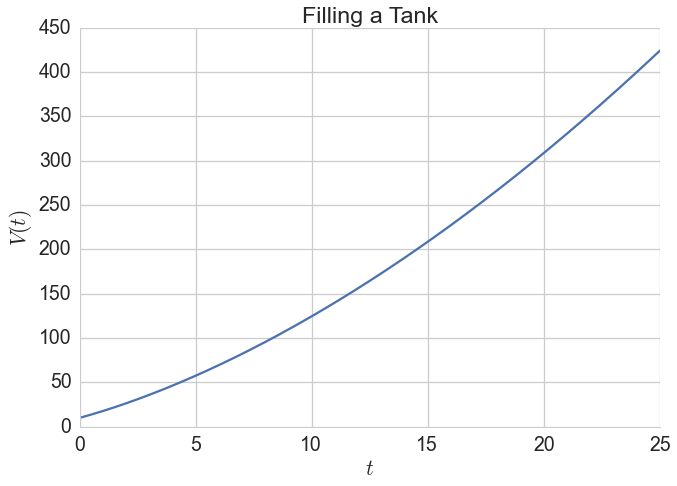

In [4]:
def tank(V,t, k_1 = 1, k_2 = 4):
    return k_2 + k_1 * sqrt(V)

tank_init = 10
t_points = np.linspace(0,25,500)
V_points = scipy.integrate.odeint(tank,tank_init,t_points)

plt.plot(t_points,V_points)
plt.title('Filling a Tank')
plt.xlabel('$t$')
plt.ylabel('$V(t)$')
seaborn.set_context('talk', font_scale = 1.5)
seaborn.set_style("whitegrid")
seaborn.despine()
plt.show()

***

3. Solve This Other ODE (6 Points + 2 EC)
====

Solve a forced, dampened ODE governed by this equation:
    
$$\frac{d^2x}{dt^2} + \frac{1}{10}\frac{dx}{dt} + k x = 5e^{-c / t}$$

using $c=0.25$ and $k=2.5$. For 2 points extra credit, instead create an interactive widget. Use an initial condition of position 0.0 and velocity 1.0.

####Problem 3 Solution:

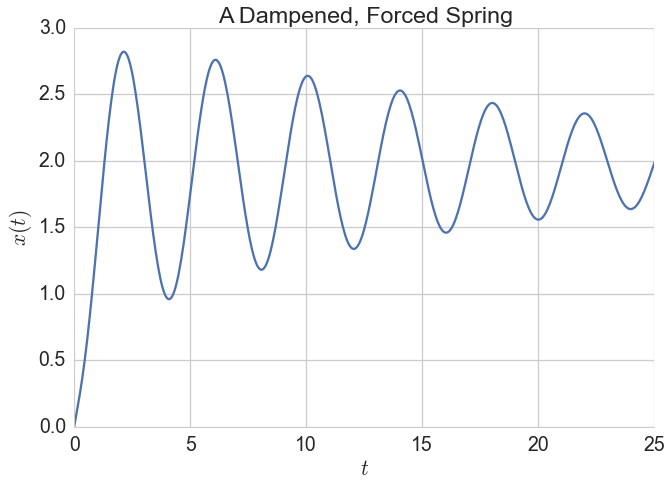

In [5]:
def spring(x,t,k=2.5,c = 0.25):
    return np.array([x[1], 5*np.exp(-c/t) - (1/10.)*x[1] - k*x[0]])

x_init = [0,1.0]
t_points = np.linspace(0.001,25.,500)
x_points = scipy.integrate.odeint(spring,x_init,t_points)

plt.plot(t_points,x_points[:,0]) #Position is the first column in the matrix
plt.title('A Dampened, Forced Spring')
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
seaborn.set_context('talk', font_scale = 1.5)
seaborn.set_style("whitegrid")
seaborn.despine()
plt.show()

**Now with an interactive widget:**

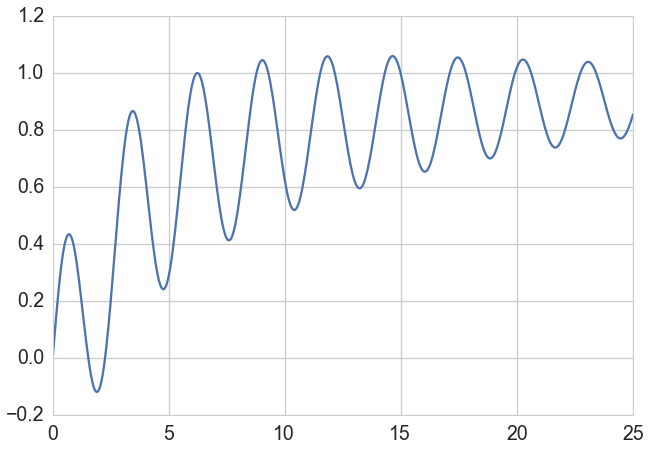

In [6]:
def spring(x,t,k=2.5,c = 0.25):
    return np.array([x[1], 5*np.exp(-c/t) - (1/10.)*x[1] - k*x[0]])

def interactive_spring(spring_constant, force_constant):
    x_init = [0,1.0] 
    t_points = np.linspace(0.001,25, 500) 
    x_points = scipy.integrate.odeint(lambda x,t: spring(x,t,k=spring_constant, c=force_constant), x_init, t_points)
    plt.plot(t_points, x_points[:,0])

seaborn.set_context('talk', font_scale = 1.5)
interactive(interactive_spring, spring_constant=(0.01, 10.0), force_constant=(0.01, 5.0))

***

4. Linear Algebra (3 Points)
===

Given that:

$$\mathbf{A} = \left[\begin{array}{lcr}
7 & 0 & 1\\
1 & 3 & 4\\
4 & 5 & 2\\
\end{array}\right]$$

$$\mathbf{b} = \left[\begin{array}{lcr}
4\\
13\\
-6\\
\end{array}\right]$$

Answer the following problems:

1. What is $\mathbf{A}\mathbf{b}$?

1. What is the largest eigenvector of $\mathbf{A}$?

2. Solve $\mathbf{A}\mathbf{x} = \mathbf{b}$

####Problem 4 Solutions:

####4.1

In [7]:
np_matrix_A = np.array([\
                        [7,0,1], \
                        [1,3,4], \
                        [4,5,2], \
                        ])

np_matrix_B = np.array([\
                        [4],  \
                        [13], \
                        [-6], \
                        ])


Ab = np_matrix_A.dot(np_matrix_B)

print 'Ab is:'
print Ab

Ab is:
[[22]
 [19]
 [69]]


####4.2

In [8]:
np_matrix_A = np.array([\
                        [7,0,1], \
                        [1,3,4], \
                        [4,5,2], \
                        ])
e_values, e_vectors = linalg.eig(np_matrix_A)

print e_vectors

print 'The largest eigenvector of A is {}.' .format(e_vectors[2,2])

[[ 0.43264513  0.39766653 -0.08674556]
 [ 0.57338348 -0.72270924 -0.59785713]
 [ 0.69573672 -0.56528992  0.79689526]]
The largest eigenvector of A is 0.796895259276.


####4.3

In [9]:
np_matrix_A = np.array([\
                        [7,0,1], \
                        [1,3,4], \
                        [4,5,2], \
                        ])

np_matrix_B = np.array([\
                        [4],  \
                        [13], \
                        [-6], \
                        ])

np_matrix_A_inv = linalg.inv(np_matrix_A)
np_matrix_x = np_matrix_A_inv.dot(np_matrix_B)

print 'The x-matrix is:'
print np_matrix_x

The x-matrix is:
[[-0.25714286]
 [-3.31428571]
 [ 5.8       ]]


***